**Remark**: See the codes and charts below.

# Sales Channel Revenue Analysis

**Data Validation**

Column-by-column steps:

|Column|Validation & Cleaning Steps|
|---|---|
|customer_id|Verified uniqueness and data type (int). No missing values found.|
|week|Confirmed weeks range from 1 to 6. No outliers or gaps.|
|sales_method|Standardized inconsistent labels (e.g., “em + call” → “Email + Call”). Converted to title case.|
|revenue|Detected missing values. Imputed using the median revenue per sales method to preserve group structure.|
|years_as_customer|Verified numeric values. No nulls. Outliers (>20 years) were retained as plausible long-term customers.|



**Exploratory Analysis**

**1. Number of Customers per Sales Method**

- What it shows: A bar chart comparing how many customers used each sales method.

- Interpretation:
    - Email is the most commonly used method.
    - Call comes second.
    - Email + Call is the least used, but likely more targeted.

**2. Revenue Distribution by Sales Method**

- What it shows: A boxplot showing how revenue varies by sales method.

- Interpretation:
    - Email + Call yields the highest median revenue and has the least variability     - great for consistent results.
    - Email has moderate revenue but high variability.
    - Call has the lowest revenue on average.

**3. Weekly Revenue by Sales Method**

- What it shows: Line plot of total weekly revenue for each sales method over six weeks.

- Interpretation:
    - Email starts strong but declines over time.
    - Email + Call gains traction and overtakes Email by week 5.
    - Call is the most stable, but contributes the least.

**4. Customer Tenure by Sales Method**

- What it shows: Boxplot showing how long customers have been with the company for each method.

- Interpretation:
    - All methods have similar tenure distributions, though Email has more outliers (very long-time customers).
    - Slight indication that Call might be used more with newer customers.


**5. Distribution of Revenue**

- What it shows: Histogram showing the distribution of revenue across all customers, regardless of sales method.

- Interpretation:
    - Revenue data is multi-modal, suggesting distinct customer segments.
    - The most common revenue bands are around \$40-50 and \$90–100, likely linked to specific sales methods (e.g., Call and Email).
    - A third peak near $180–200 suggests Email + Call drives higher revenue but is less frequently used.
    - The presence of a long right tail indicates a few customers generate significantly higher revenue.
    - Overall, the chart reinforces the idea that different sales methods are associated with different revenue levels.

**Metric for the Business to Monitor**

**Metric Name**: Revenue per Customer (RPC)

- We use this metric beccause it combines customer acquisition and revenue performance into one simple number.
- It gives insight into how much value (in revenue) the business earns per individual customer.
- This makes it easier to compare performance across different sales methods and time periods.


**1. How should the business use this metric?**

- Use RPC to compare the effectiveness of different sales methods.
- Higher RPC means that method is generating more value per customer.
- Allocate more resources to the sales methods with the highest RPC.
- Re-evaluate or improve the methods with consistently low RPC.
- Use it weekly or monthly to measure the impact of marketing or sales campaigns.
- Identify high-RPC customer segments for personalized targeting.

**2. Estimated Initial Values (based on current data)**

|Sales Method|Total Revenue|Customers|Revenue per Customer (RPC)|
|---|---|---|---|
|Email|$853,387.29|7,529|$113.33|
|Call|$258,865.40|4,949|$52.31|
|Email + Call|$895,896.53|2,547|$351.74|

**Key Insight**:
- Email + Call has the highest RPC by a wide margin → it generates the most revenue per customer.
- Despite fewer customers, it brings higher value, so this method should be expanded and optimized.



**Final Summary & Business Recommendations**

**Summary of Key Insights**
- Customer Distribution:
    -The majority of customers prefer the Email sales method, followed by Call, and lastly Email + Call.

**Revenue Patterns:**

- Email + Call generates the highest revenue per customer (RPC), indicating it is the most effective method for monetization.
- Call has the lowest RPC, suggesting it may not be cost-effective on its own.
- Email brings in solid customer numbers but shows declining revenue over time, likely due to saturation or fatigue.
- Weekly Revenue Trends:
-Email starts strong but drops, while Email + Call grows steadily over time indicating strong long-term potential.

**Customer Tenure:**
Customers across all methods have similar tenure, so tenure isn’t a key driver of sales method success.

**Recommendations:**

1. Double Down on Email + Call Strategy
- It brings highest revenue per customer and shows growing weekly revenue trends.
- Consider scaling this method—automate where possible, and personalize outreach.

2. Revamp Standalone Call Strategy
- With the lowest RPC, calls alone may not be converting well.
- Use calls only in combination with other channels like email or web engagement.

3. Reinvigorate Email-Only Campaigns
- Email has a large customer base but is declining in effectiveness.
- Introduce A/B testing, better segmentation, or fresh campaign designs to boost performance.

4. Track Revenue per Customer (RPC) Weekly
- Use RPC as a KPI to evaluate each sales method's efficiency.
- Monitor weekly changes to quickly identify underperforming campaigns.

5. Customer Experience Focus
- Although customer tenure is similar across methods, improving experience (especially for high-value RPC channels) can drive loyalty and retention.


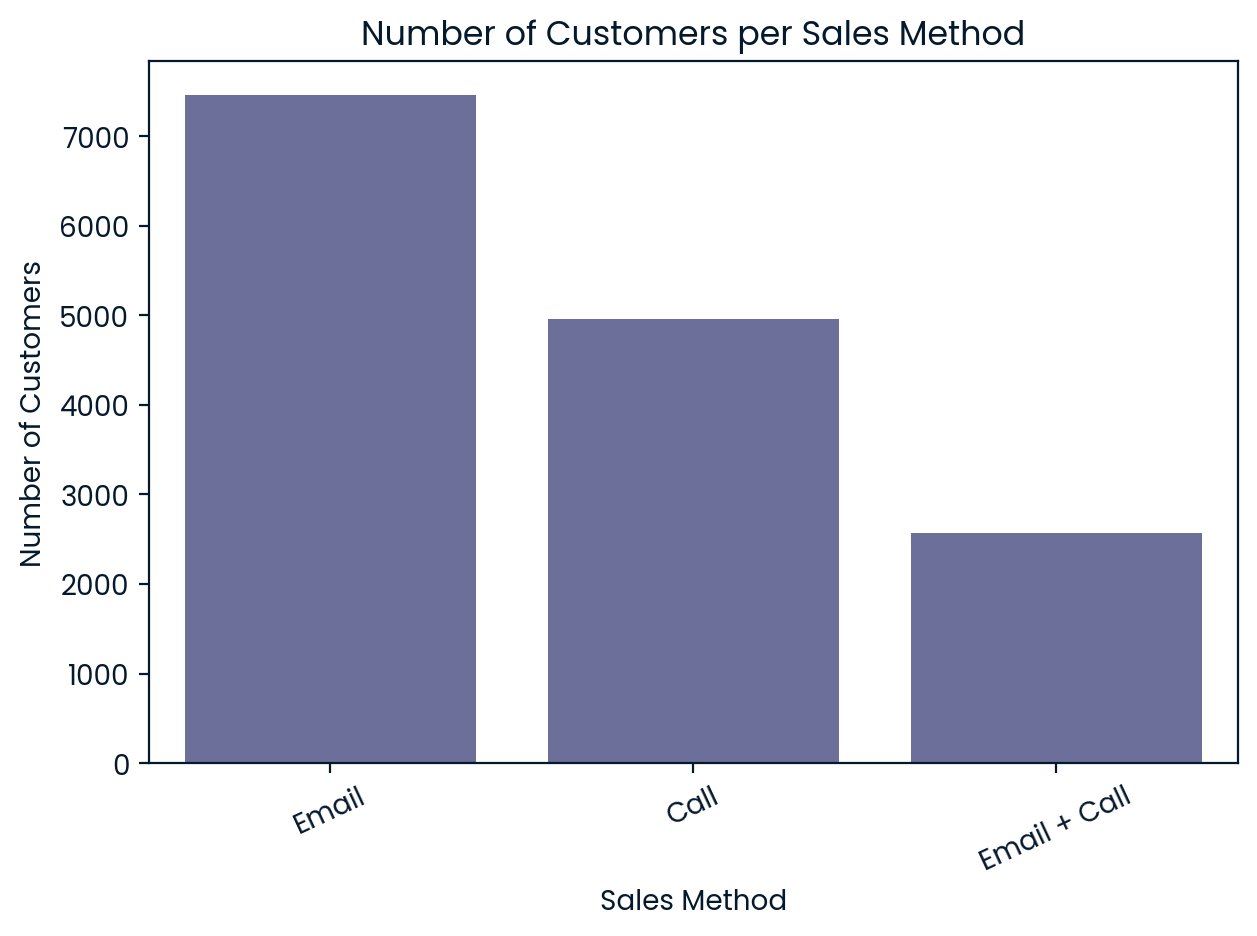

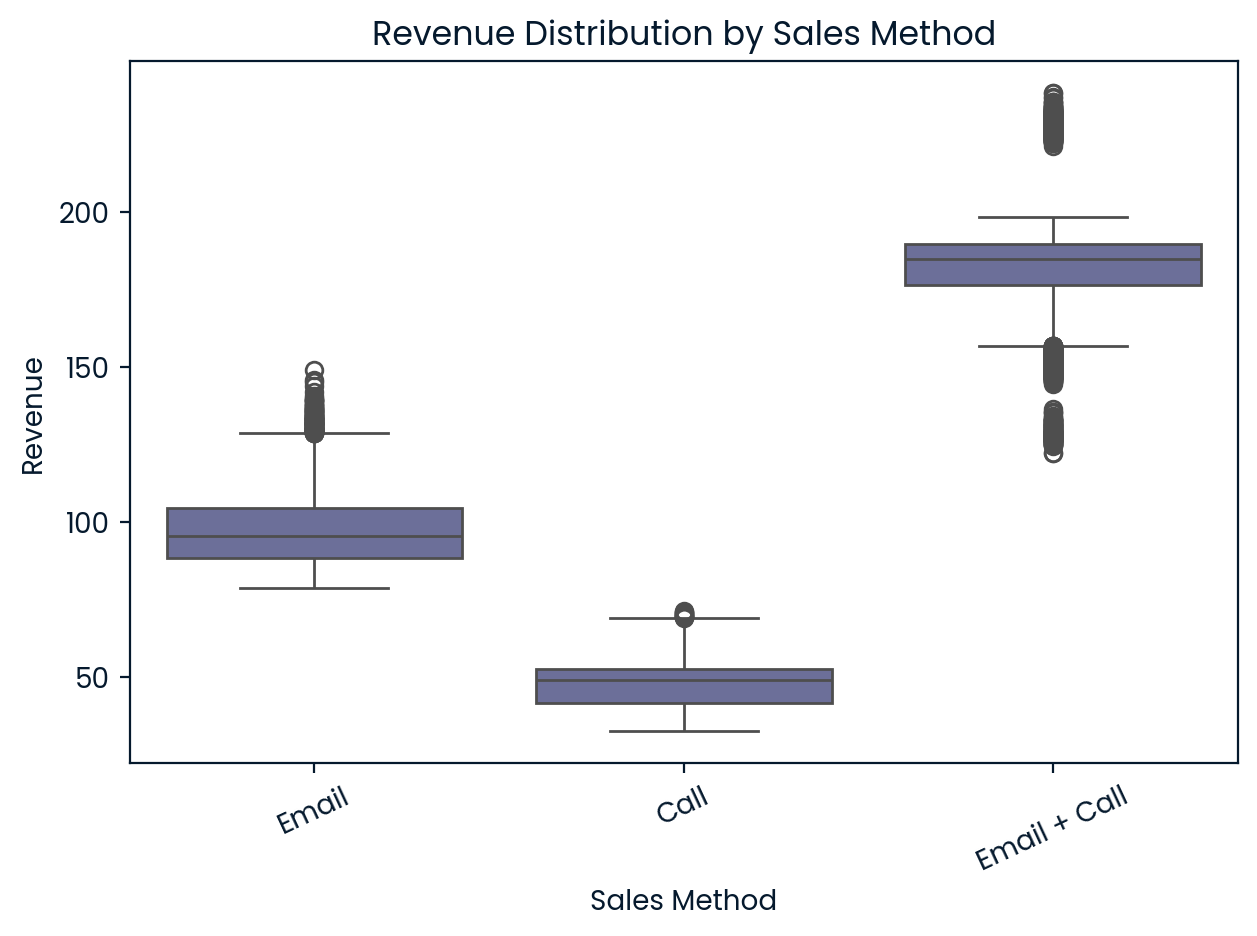

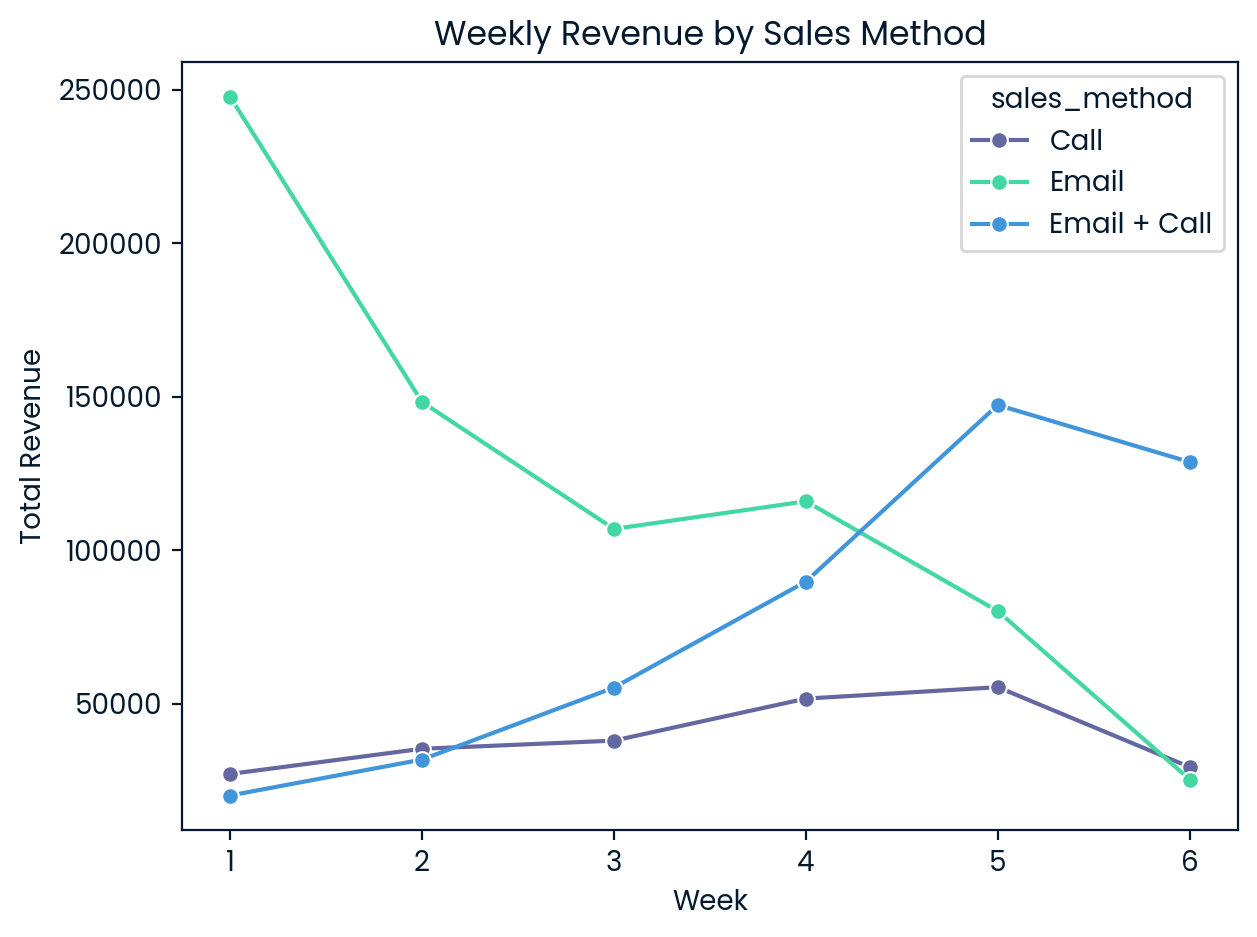

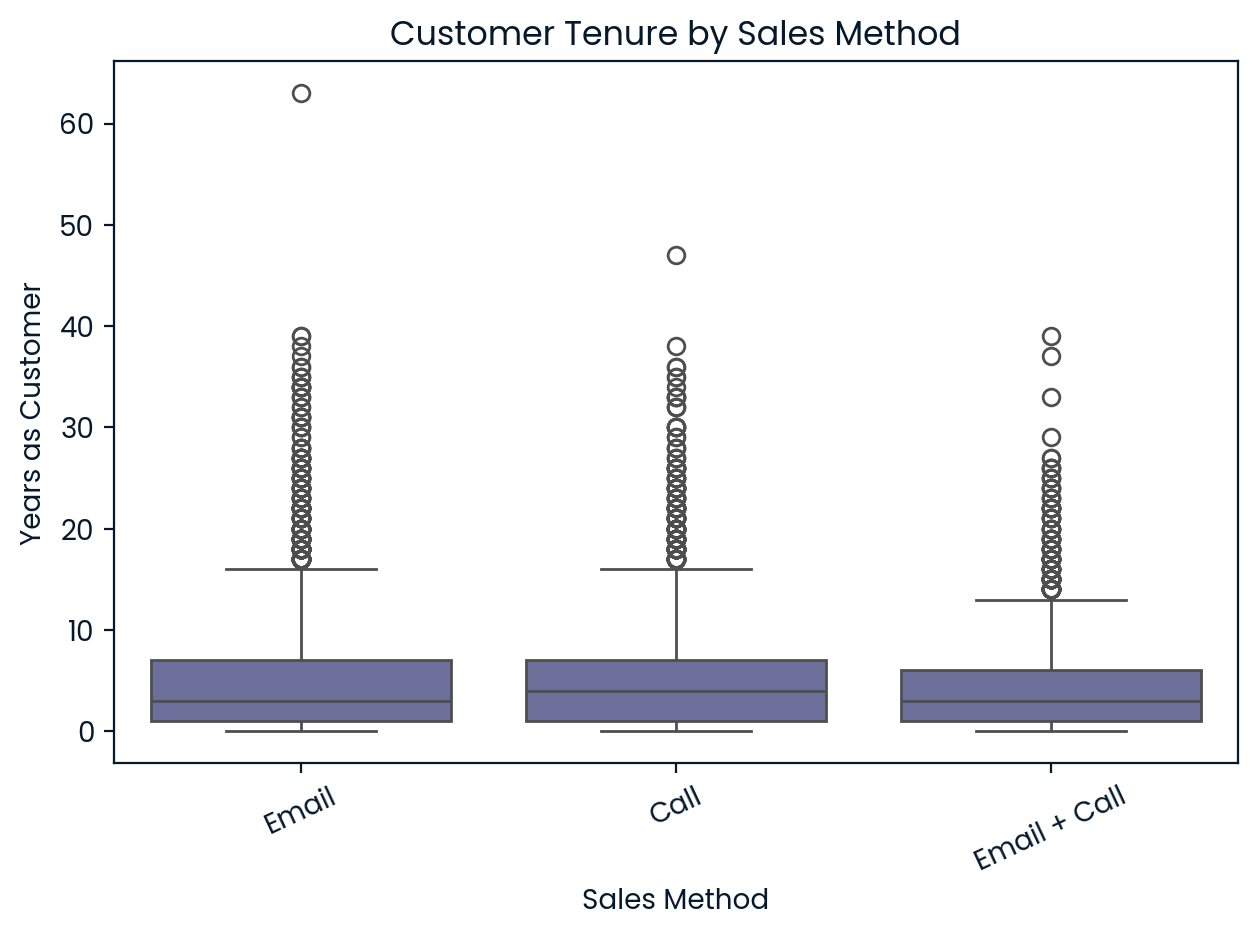

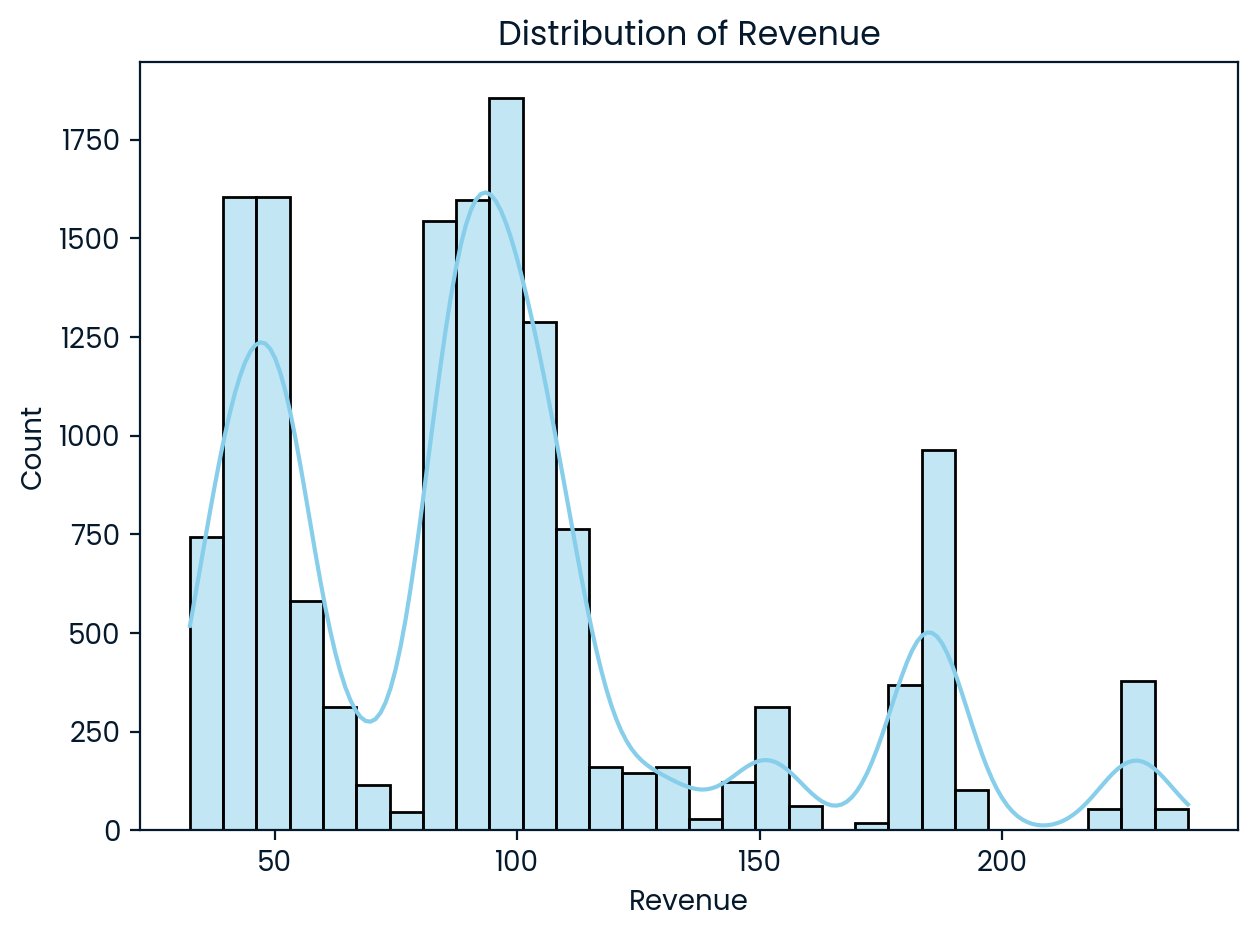

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df1 = pd.read_csv('product_sales.csv')
df = df1.copy()

# Data Cleaning 
df['sales_method'] = df['sales_method'].str.lower().str.strip()
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'Email + Call',
    'email+call': 'Email + Call',
    'email & call': 'Email + Call',
    'email': 'Email',
    'call': 'Call'
})
df['sales_method'] = df['sales_method'].str.title()

for col in ['customer_id', 'week', 'revenue', 'years_as_customer']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['revenue'] = df.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.median()))

# Exploratory Data Analysis

sns.countplot(data=df, x='sales_method', order=df['sales_method'].value_counts().index)
plt.title('Number of Customers per Sales Method')
plt.ylabel('Number of Customers')
plt.xlabel('Sales Method')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x='sales_method', y='revenue', order=df['sales_method'].value_counts().index)
plt.title('Revenue Distribution by Sales Method')
plt.ylabel('Revenue')
plt.xlabel('Sales Method')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

weekly = df.groupby(['week','sales_method'])['revenue'].sum().reset_index()
sns.lineplot(data=weekly, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Weekly Revenue by Sales Method')
plt.ylabel('Total Revenue')
plt.xlabel('Week')
plt.xticks(sorted(df['week'].unique()))
plt.tight_layout()
plt.show()


sns.boxplot(data=df, x='sales_method', y='years_as_customer', order=df['sales_method'].value_counts().index)
plt.title('Customer Tenure by Sales Method')
plt.ylabel('Years as Customer')
plt.xlabel('Sales Method')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

sns.histplot(df['revenue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()